<a href="https://colab.research.google.com/github/eigeneddie/normal-dist-g-colab/blob/main/normal_dist_from_hist_20220618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import scoreatpercentile
import statistics

# ====== Data yang diberikan =======
# data yang ingin dicari probability 
# distributionnya dimasukan ke variabel data_bap

# some anonymous data I found that might have a normal distribution characteristic.
# this data is for an example.
data_bap = [1.08,	1.19,	0.98,	1.33,	1.00,	0.97,	0.83,	1.07,	1.28,	1.15,	0.71,	0.73,	0.58,	0.67,
            0.63,	0.93,	1.27,	1.24,	1.29,	1.07,	1.24,	1.03,	1.10,	1.07,	1.32,	1.26,	1.24,	1.25,
            0.99,	0.89,	0.89,	0.82, 1.40,	0.97,	0.79,	1.24,	1.51,	1.32,	1.13, 1.27,	1.30,	0.97,
            1.33,	1.23,	1.42,	1.38,	1.14,	1.42,	1.12,	1.22,	1.29,	1.12,	1.38,	1.03,	1.01,	0.77,	
            0.64,	1.27,	1.05,	0.92,	0.99,	0.87,	1.20,	0.85,	0.88,	0.95,	1.26,	0.88,	0.82,	0.92];
# ==================================

num_bins = 12
min_score = min(data_bap)
max_score = max(data_bap)
n = 150
x_axis = np.arange(min_score, max_score, (max_score-min_score)/n)

print(np.size(data_bap))
print(n)
print(np.size(x_axis))

# Calculating mean and standard deviation from given data
mean = statistics.mean(data_bap)
sd = statistics.stdev(data_bap)

mu = mean
sigma = sd

print(mean)
print(sd)

70
150
150
1.0765714285714285
0.2211097551206726


1.0765714285714285
1.3599349814035098
1.4402646112360187


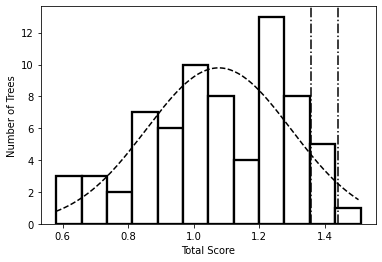

'\nTAMBAHAN REFERENSI\n\na. Some reference for excel\n----------------------------\n  https://public.tableau.com/en-us/s/blog/2013/11/fitting-normal-curve-histogram\n\n\nb. Normalized probability dist. function\n-----------------------------------------\n  y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *\n      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))\n\n\nc. Scaled probability dist. funciton to histogram data \n-------------------------------------------------------\n  y = y*<data_size>*<bin_size>\n'

In [6]:
n, bins, patches = plt.hist(data_bap, 
                            num_bins, 
                            range = [min_score, max_score],
                            rwidth = 6,
                            density = 0, 
                            histtype = 'bar',
                            edgecolor = 'black',
                            linewidth = '2.3',
                            color ='white',
                            alpha = 1)

# Check percentiles
per50th = norm.ppf(0.50,mu,sigma)
per90th = norm.ppf(0.90,mu,sigma)
per95th = norm.ppf(0.95,mu,sigma)

print(per50th)
print(per90th)
print(per95th)

y_axis = np.size(data_bap)*(max_score-min_score)/num_bins*norm.pdf(x_axis, mean, sd)

plt.plot(x_axis, y_axis, '--', color = 'black')  
plt.xlabel('Total Score')
plt.ylabel('Number of Trees')

plt.axvline(x=per90th, color='k', linestyle = '-.')
plt.axvline(x=per95th, color='k', linestyle = '-.')

#plt.grid(True)
#plt.legend()
plt.show()

'''
TAMBAHAN REFERENSI

a. Some reference for excel
----------------------------
  https://public.tableau.com/en-us/s/blog/2013/11/fitting-normal-curve-histogram


b. Normalized probability dist. function
-----------------------------------------
  y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))


c. Scaled probability dist. funciton to histogram data 
-------------------------------------------------------
  y = y*<data_size>*<bin_size>
'''